# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [28]:
#Initial state. r_0 is the initial distance between the Earth and the Sun, taken to be the y-distance.
#vx0 is Earth's initial velocity, taken to be in the negative x-direction.

r_0 = 147e9 * m
vx0 = -30330 * m/s

init = State(x = 0, y = r_0, vx = vx0, vy = 0)

,values
x,0
y,147000000000.0 meter
vx,-30330.0 meter / second
vy,0


In [43]:
# Making a system object. r_earth and r_sun are the radii of the earth and sun, respectively.
# G is the universal gravitational constant. m1 is the mass of the sun and m2 is the mass of the earth.
# t_0 and t_end are the time the model is limited to.

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e7 * s)

,values
init,x 0 y 1470000...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [44]:
# Function that computes the gravity force vector in the direction of the sun from the earth.

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    direction = Vector(-x, -y)
    force = (G * m1 * m2) / (x**2 + y**2)
    gravity = force * direction.hat()
    return gravity

In [45]:
# Testing the gravity function.
universal_gravitation(init, system)

<Quantity([ 0.0000000e+00 -3.6686486e+22], 'newton')>

In [46]:
# Outputs the rates of change of x and y positions, and x and y velocities.

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = force[0] / m2
    dvydt = force[1] / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [47]:
# Testing the slope function.

slope_func(init, 0, system)

(<Quantity(-30330.0, 'meter / second')>,
 0,
 <Quantity(0.0, 'newton / kilogram')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>)

In [48]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,110
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [49]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(10000000.0, 'second')>

In [50]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(115.74074074074072, 'day')>

In [51]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 500)
results, details = run_ode_solver(system, slope_func, t_eval=ts, method = 'RK23')
details

,values
sol,None
t_events,[]
nfev,74
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [52]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [53]:
# Scaling the distance to million km
y = results.y / 1e9;

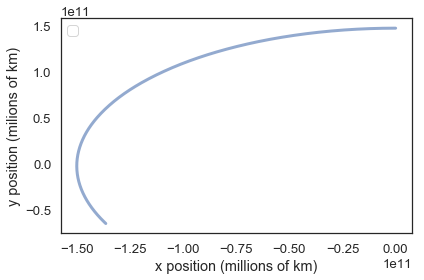

In [54]:
# And plotting
plot(results.x, results.y)


decorate(xlabel='x position (millions of km)',
         ylabel='y position (milions of km)')

In [42]:
# Plotting the orbit of the earth over one year.
ts2 = linspace(0, 31556736, 500)
results2, details = run_ode_solver(system, slope_func, t_eval=ts2, method = 'RK23')
details

,values
sol,None
t_events,[]
nfev,2957
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


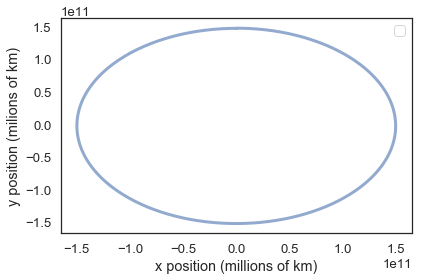

In [101]:
results2.index /= 60 * 60 * 24
y = results2.y / 1e9;
# And plotting
plot(results2.x, results2.y)
#plot(y, label='y')

decorate(xlabel='x position (millions of km)',
         ylabel='y position (milions of km)')